# Household Electric Power Consumption Analysis

This notebook demonstrates how to **load**, **clean**, **explore**, and **visualize** a sample dataset from Kaggle.

## Dataset: Individual Household Electric Power Consumption

- **Source:** [Kaggle Dataset Link](https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set)
- **Description:** Measurements of electric power consumption in one household with a one-minute sampling rate over almost 4 years (Dec 2006 - Nov 2010).
- **Variables:**
    - `date`: Date (dd/mm/yyyy)
    - `time`: Time (hh:mm:ss)
    - `global_active_power`: Global minute-averaged active power (kW)
    - `global_reactive_power`: Global minute-averaged reactive power (kW)
    - `voltage`: Minute-averaged voltage (V)
    - `global_intensity`: Global minute-averaged current intensity (A)
    - `sub_metering_1`: Energy sub-metering No. 1 (kitchen)
    - `sub_metering_2`: Energy sub-metering No. 2 (laundry room)
    - `sub_metering_3`: Energy sub-metering No. 3 (water heater, AC)
- **Missing Values:** About 1.25% of rows have missing values, represented by empty fields.


#### 1. Load and Clean data

In [172]:
# pip install matplotlib
# pip install seaborn
# pip install pandas

In [173]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [174]:
#load csv

df = pd.read_csv('./csv/household_power_consumption.txt', delimiter=';')

C:\Users\minh.chau\AppData\Local\Temp\ipykernel_46780\859726862.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./csv/household_power_consumption.txt', delimiter=';')


In [175]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [176]:
# describe
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [177]:
# concat and convert datetime and numeric columns
df['DateTime'] = df.Date + ' ' + df.Time


In [178]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

C:\Users\minh.chau\AppData\Local\Temp\ipykernel_46780\2138640164.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DateTime'] = pd.to_datetime(df['DateTime'])


In [179]:
# convert to numeric, assign NaN if not valid
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'],errors='coerce' )

In [180]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'DateTime'],
      dtype='object')

In [181]:
tarCols = ['Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3']
for col in tarCols:
    df[col] = pd.to_numeric(df[col],errors='coerce' )

In [182]:
# drop na values
df = df.dropna()

In [183]:
df.isna().sum().sum()
# should be 0 now

0

#### 2. Feature Engineering and Aggregation

In [184]:
df['hour'] = df['DateTime'].dt.hour
df['dayofweek'] = df['DateTime'].dt.day_name()
df['date'] = df['DateTime'].dt.date

In [185]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime,hour,dayofweek,date
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,17,Saturday,2006-12-16
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,17,Saturday,2006-12-16
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,17,Saturday,2006-12-16
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,17,Saturday,2006-12-16
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,17,Saturday,2006-12-16


In [186]:
# aggregation
daily = df.groupby('date')['Global_active_power'].sum().reset_index()
hourly = df.groupby(['date','hour'])['Global_active_power'].mean().reset_index()

In [187]:
print(daily)

            date  Global_active_power
0     2006-12-16             1209.176
1     2006-12-17             3390.460
2     2006-12-18             2203.826
3     2006-12-19             1666.194
4     2006-12-20             2225.748
...          ...                  ...
1428  2010-11-22             2041.536
1429  2010-11-23             1577.536
1430  2010-11-24             1796.248
1431  2010-11-25             1431.164
1432  2010-11-26             1488.104

[1433 rows x 2 columns]


In [188]:
print(hourly)

             date  hour  Global_active_power
0      2006-12-16    17             4.222889
1      2006-12-16    18             3.632200
2      2006-12-16    19             3.400233
3      2006-12-16    20             3.268567
4      2006-12-16    21             3.056467
...           ...   ...                  ...
34163  2010-11-26    17             1.725900
34164  2010-11-26    18             1.573467
34165  2010-11-26    19             1.659333
34166  2010-11-26    20             1.163700
34167  2010-11-26    21             0.934667

[34168 rows x 3 columns]


##### 3. Visualization

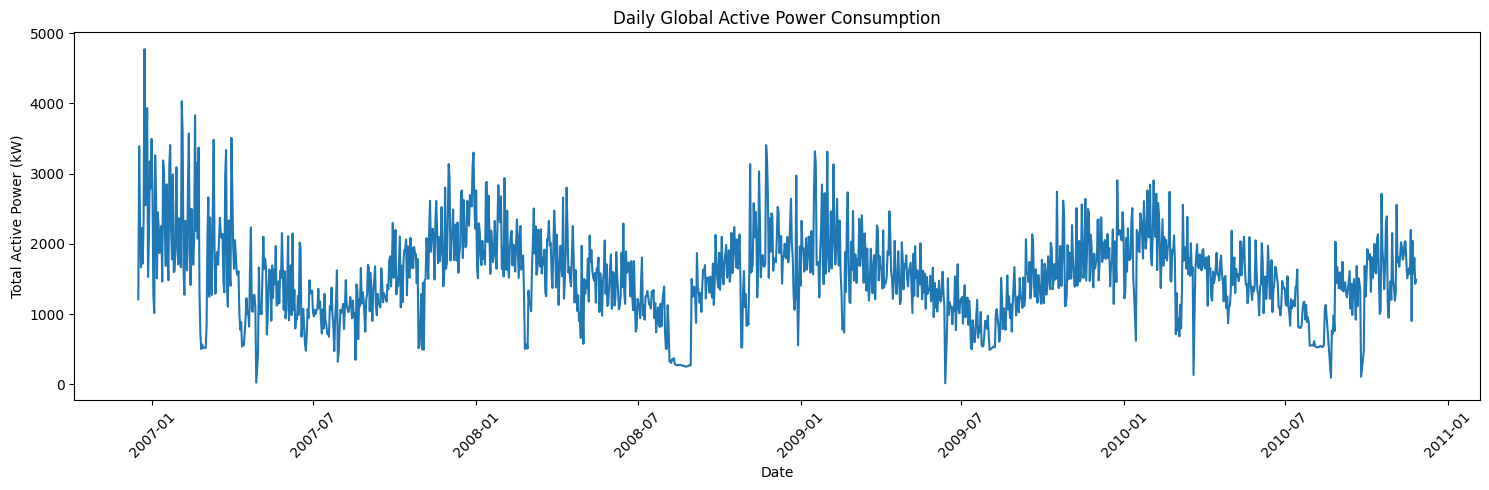

In [189]:
# daily usage line plot
# 1. Daily usage line plot
# Daily usage line plot
plt.figure(figsize=(15, 5))
sns.lineplot(data=daily, x='date', y='Global_active_power')
plt.title('Daily Global Active Power Consumption')
plt.xlabel('Date')
plt.ylabel('Total Active Power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: xlabel='hour', ylabel='Global_active_power'>

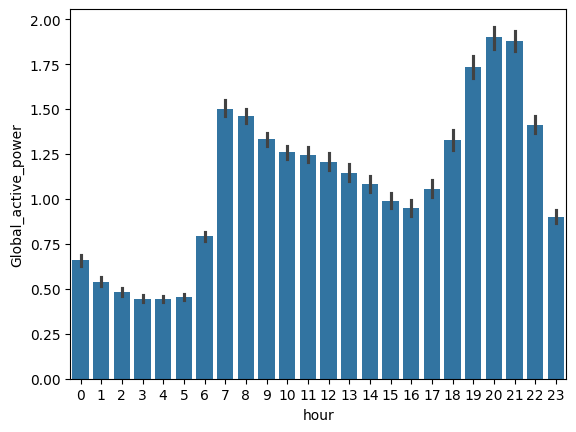

In [190]:

# 2. Avg consumption by hour
sns.barplot(data=hourly, x='hour', y='Global_active_power')


###### Comment: the pattern is quite common where energy is not used much during the late night time, peaks at the evening and norning where people at home or preparing to go to work.  

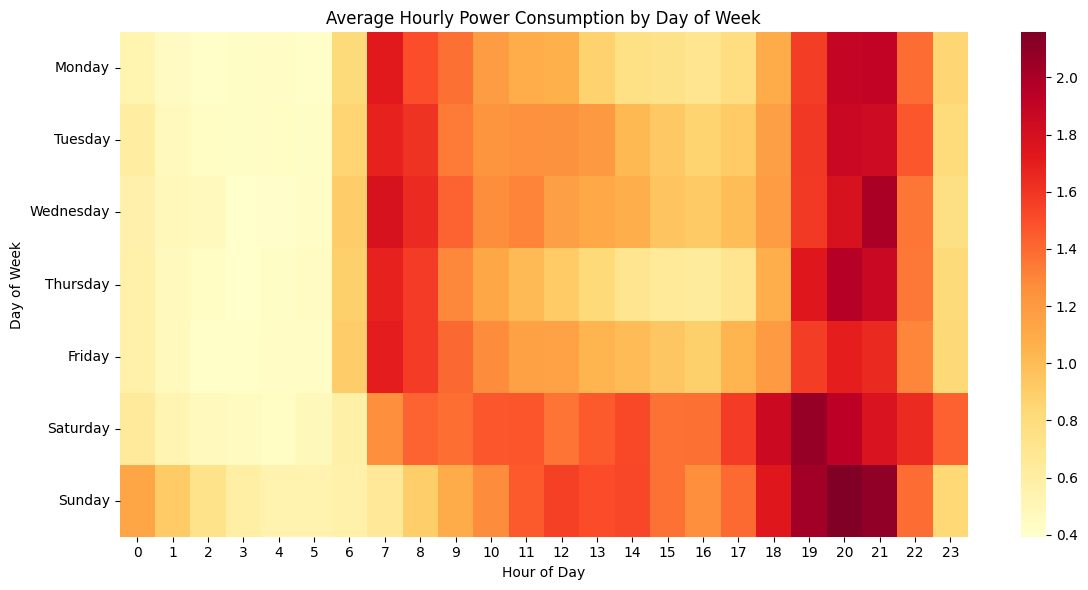

In [191]:
# Heatmap: day-of-week vs hour
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = df.pivot_table(index='dayofweek', columns='hour',
                       values='Global_active_power', aggfunc='mean')
pivot = pivot.reindex(days_order)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title('Average Hourly Power Consumption by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

##### comment: this reveal additional insight where the intensity on Weekdays and Weekends looks different. For household uses, weekdays patern looks similar across the week. However, weekends is different, people stay later on Sat nights, until mid-night, using elk at day time is also a lot higher as they are not going to work.

##### 4 Feature Engineering - Create a unified DS

In [192]:
df_copy = df.reset_index()[['DateTime', 'Global_active_power']].copy()
df_copy['DateTime'] = pd.to_datetime(df_copy['DateTime'])
df_copy.set_index('DateTime', inplace=True)
data = df_copy.dropna()

##### 4. Forecasting with Facebook Prophet

In [193]:
# let's split train test by past and future 1 week
# Train/test split
test_hours = 168


In [194]:
#pip install prophet
from prophet import Prophet
# 2. Resample to hourly (mean, sum, or as appropriate for your data)
df_hourly = data['Global_active_power'].resample('H').sum()
df_train = df_hourly[:-test_hours]
df_test = df_hourly[-test_hours:]

# Prepare data for Prophet
df_prophet_train = df_train.reset_index().rename(columns={'DateTime': 'ds', 'Global_active_power': 'y'})



In [195]:
print("Train period:", df_train.index.min(), "to", df_train.index.max())
print("Test period:", df_test.index.min(), "to", df_test.index.max())

Train period: 2006-12-16 17:00:00 to 2010-11-19 21:00:00
Test period: 2010-11-19 22:00:00 to 2010-11-26 21:00:00


In [196]:
df_prophet_train.head()
# should has column ds and y

,ds,y
0,2006-12-16 17:00:00,152.024
1,2006-12-16 18:00:00,217.932
2,2006-12-16 19:00:00,204.014
3,2006-12-16 20:00:00,196.114
4,2006-12-16 21:00:00,183.388


In [197]:
df_test.head()

DateTime
2010-11-19 22:00:00    36.118
2010-11-19 23:00:00    20.052
2010-11-20 00:00:00    19.018
2010-11-20 01:00:00    17.094
2010-11-20 02:00:00    21.402
Freq: H, Name: Global_active_power, dtype: float64

In [198]:
model_prophet = Prophet()
model_prophet.fit(df_prophet_train)

10:25:31 - cmdstanpy - INFO - Chain [1] start processing
10:25:38 - cmdstanpy - INFO - Chain [1] done processing


In [199]:
# Only predict for the test period
# Forecast
# Create DataFrame with only the test period datetimes
future = pd.DataFrame({'ds': df_test.index})
forecast = model_prophet.predict(future)



In [200]:
# Get only test period
forecast_test = forecast.set_index('ds').loc[df_test.index]

##### 5. forecast with XGBoost

In [201]:
import xgboost as xgb

In [202]:
# Create lagged features for training
def create_lag_features(series, lags=24):
    df = pd.DataFrame(series)
    for i in range(1, lags+1):
        df[f'lag_{i}'] = df['Global_active_power'].shift(i)
    df = df.dropna()
    return df

In [203]:
lags = 24
df_xgb = create_lag_features(df_hourly, lags)

# Train/test split
df_xgb_train = df_xgb[:-test_hours]
df_xgb_test = df_xgb[-test_hours:]

In [204]:
# Features and target
X_train = df_xgb_train.drop(columns='Global_active_power')
y_train = df_xgb_train['Global_active_power']
X_test = df_xgb_test.drop(columns='Global_active_power')
y_test = df_xgb_test['Global_active_power']

In [205]:
# Train XGBoost
model_xgb = xgb.XGBRegressor(n_estimators=100)
model_xgb.fit(X_train, y_train)

# Predict
xgb_pred = model_xgb.predict(X_test)

# Align index
xgb_forecast = pd.Series(xgb_pred, index=y_test.index)

In [206]:

import matplotlib.pyplot as plt

In [207]:
forecast_test['yhat']

DateTime
2010-11-19 22:00:00    102.077914
2010-11-19 23:00:00     76.852212
2010-11-20 00:00:00     60.411409
2010-11-20 01:00:00     53.300076
2010-11-20 02:00:00     49.677067
                          ...    
2010-11-26 17:00:00     78.815255
2010-11-26 18:00:00     99.645737
2010-11-26 19:00:00    123.776672
2010-11-26 20:00:00    135.609904
2010-11-26 21:00:00    126.994241
Name: yhat, Length: 168, dtype: float64

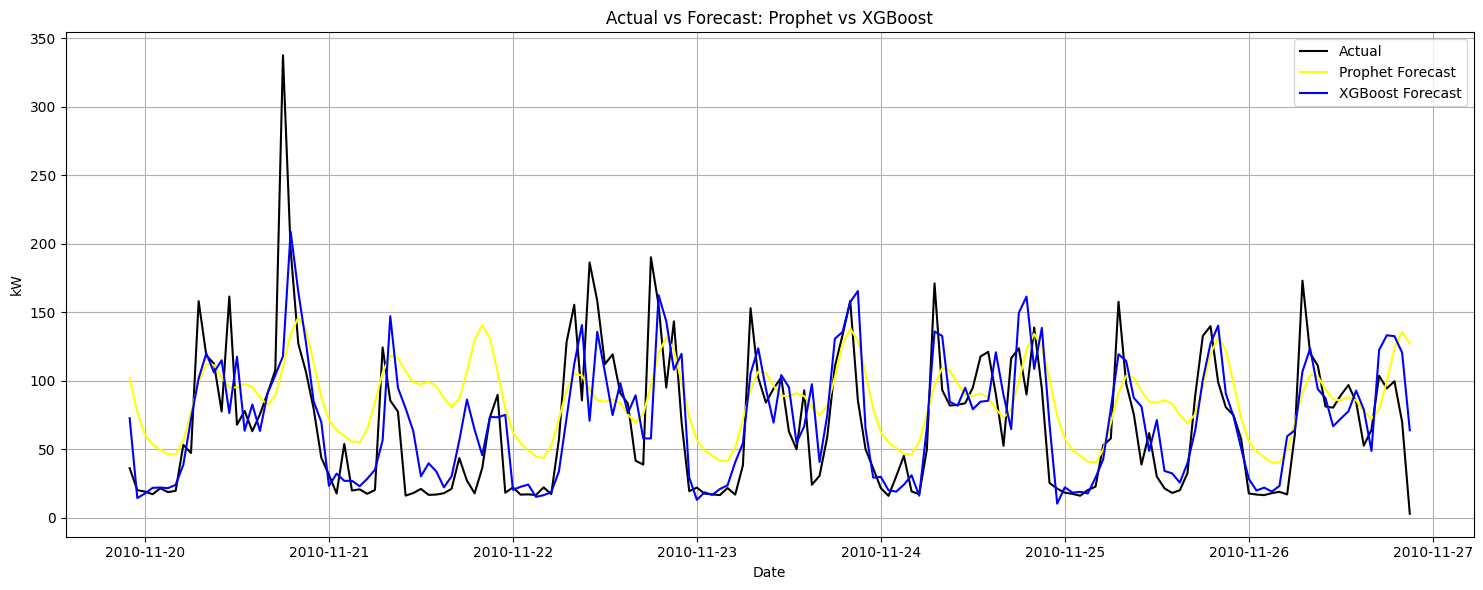

In [208]:
# plot forecast vs actual

plt.figure(figsize=(15,6))
plt.plot(df_test.index, df_test.values, label='Actual', color='black')
plt.plot(forecast_test.index, forecast_test['yhat'], label='Prophet Forecast', color='yellow')
plt.plot(xgb_forecast.index, xgb_forecast.values, label='XGBoost Forecast', color='blue')
plt.title('Actual vs Forecast: Prophet vs XGBoost')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



##### 6. compare prophet vs XGBoost

In [209]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [210]:

def evaluate(y_true, y_pred, label):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    if len(y_true) != len(y_pred):
        raise ValueError(f"y_true and y_pred must have the same length (got {len(y_true)} and {len(y_pred)})")
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mask = y_true > 0.1
    if np.sum(mask) == 0:
        mape = np.nan
    else:
        mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    print(f'{label} → RMSE: {rmse:.3f}, MAE: {mae:.3f}, MAPE: {mape:.2f}% (filtered, y_true > 0.1)')


In [211]:
df_test.values.mean()

68.38496428571428

In [212]:
evaluate(df_test.values, forecast_test['yhat'].values, 'Prophet')
evaluate(y_test.values, xgb_pred, 'XGBoost')

Prophet → RMSE: 45.525, MAE: 35.853, MAPE: 131.74% (filtered, y_true > 0.1)
XGBoost → RMSE: 35.786, MAE: 23.510, MAPE: 57.32% (filtered, y_true > 0.1)


interpreting the Results

Prophet struggles when patterns are noisy or driven by exogenous variables it can’t model well.

XGBoost wins across the board, likely because:

It captured more short-term patterns (lags, rolling stats).

It can model nonlinearities better than Prophet’s decomposed trend/seasonality approach.

| Metric   | Prophet | XGBoost    | Winner    |
| -------- | ------- | ---------- | --------- |
| **RMSE** | 45.525  | **35.786** | ✅ XGBoost |
| **MAE**  | 35.853  | **23.510** | ✅ XGBoost |
| **MAPE** | 131.74% | **57.32%** | ✅ XGBoost |

Model optimization is needed

##### 6. Model optimization

##### 6.1 Optimize XGBoost by using Lag, Rolling, Calendar awareness

In [213]:
df_copy2 = df.reset_index()[['DateTime', 'Global_active_power']].copy()

In [214]:
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 2 columns):
 #   Column               Dtype         
---  ------               -----         
 0   DateTime             datetime64[ns]
 1   Global_active_power  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.3 MB


In [215]:
df_copy2['DateTime'] = pd.to_datetime(df_copy2['DateTime'])
df_copy2.set_index('DateTime', inplace=True)

df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 1 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Global_active_power  float64
dtypes: float64(1)
memory usage: 31.3 MB


In [216]:
df_copy2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 1 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Global_active_power  float64
dtypes: float64(1)
memory usage: 31.3 MB


In [217]:
df_copy2['load'] = df_copy2['Global_active_power']

In [218]:
# Create lag features
df_copy2['lag_1'] = df_copy2['Global_active_power'].shift(1)
df_copy2['lag_24'] = df_copy2['Global_active_power'].shift(24)

# Rolling stats
df_copy2['rolling_mean_24'] = df_copy2['Global_active_power'].rolling(24).mean()
df_copy2['rolling_std_24'] = df_copy2['Global_active_power'].rolling(24).std()

# Time features
df_copy2['hour'] = df_copy2.index.hour
df_copy2['dayofweek'] = df_copy2.index.dayofweek
df_copy2['is_weekend'] = df_copy2['dayofweek'].isin([5, 6]).astype(int)

# Drop rows with NaNs from shifting/rolling
data2 = df_copy2.dropna()

In [219]:
data2.head()

,Global_active_power,load,lag_1,lag_24,rolling_mean_24,rolling_std_24,hour,dayofweek,is_weekend
DateTime,,,,,,,,,
2006-12-16 17:48:00,4.474,4.474,5.174,4.216,4.574917,1.210663,17,5,1
2006-12-16 17:49:00,3.248,3.248,4.474,5.360,4.486917,1.227753,17,5,1
2006-12-16 17:50:00,3.236,3.236,3.248,5.374,4.397833,1.238111,17,5,1
2006-12-16 17:51:00,3.228,3.228,3.236,5.388,4.307833,1.241507,17,5,1
2006-12-16 17:52:00,3.258,3.258,3.228,3.666,4.290833,1.253414,17,5,1


In [227]:
data2.tail(168)

,Global_active_power,load,lag_1,lag_24,rolling_mean_24,rolling_std_24,hour,dayofweek,is_weekend
DateTime,,,,,,,,,
2010-11-26 18:15:00,1.386,1.386,1.444,1.970,1.236167,0.300728,18,4,0
2010-11-26 18:16:00,1.382,1.382,1.386,2.064,1.207750,0.246422,18,4,0
2010-11-26 18:17:00,1.434,1.434,1.382,2.078,1.180917,0.171086,18,4,0
2010-11-26 18:18:00,1.640,1.640,1.434,1.622,1.181667,0.173130,18,4,0
2010-11-26 18:19:00,1.694,1.694,1.640,1.044,1.208750,0.199492,18,4,0
...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.946,0.946,0.968,0.970250,0.056125,20,4,0
2010-11-26 20:59:00,0.944,0.944,0.946,0.960,0.969583,0.056347,20,4,0
2010-11-26 21:00:00,0.938,0.938,0.944,0.964,0.968500,0.056707,21,4,0


In [220]:
# let's split train test by past and future
# Train/test split
df_train2 = data2[:-test_hours]
df_test2 = data2[-test_hours:]

# Features and target
X_train2 = df_train2.drop(columns='Global_active_power')
y_train2 = df_train2['Global_active_power']
X_test2 = df_test2.drop(columns='Global_active_power')
y_test2 = df_test2['Global_active_power']

In [ ]:
# df_train2

In [ ]:
# df_test2

In [228]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

model_XGOptimized = XGBRegressor(n_estimators=100, learning_rate=0.1)
model_XGOptimized.fit(X_train2, y_train2)

y_pred2 = model_XGOptimized.predict(X_test2)


In [229]:
evaluate(y_test2, y_pred2, 'XGBoostOptimized')


XGBoostOptimized → RMSE: 0.006, MAE: 0.005, MAPE: 0.38% (filtered, y_true > 0.1)


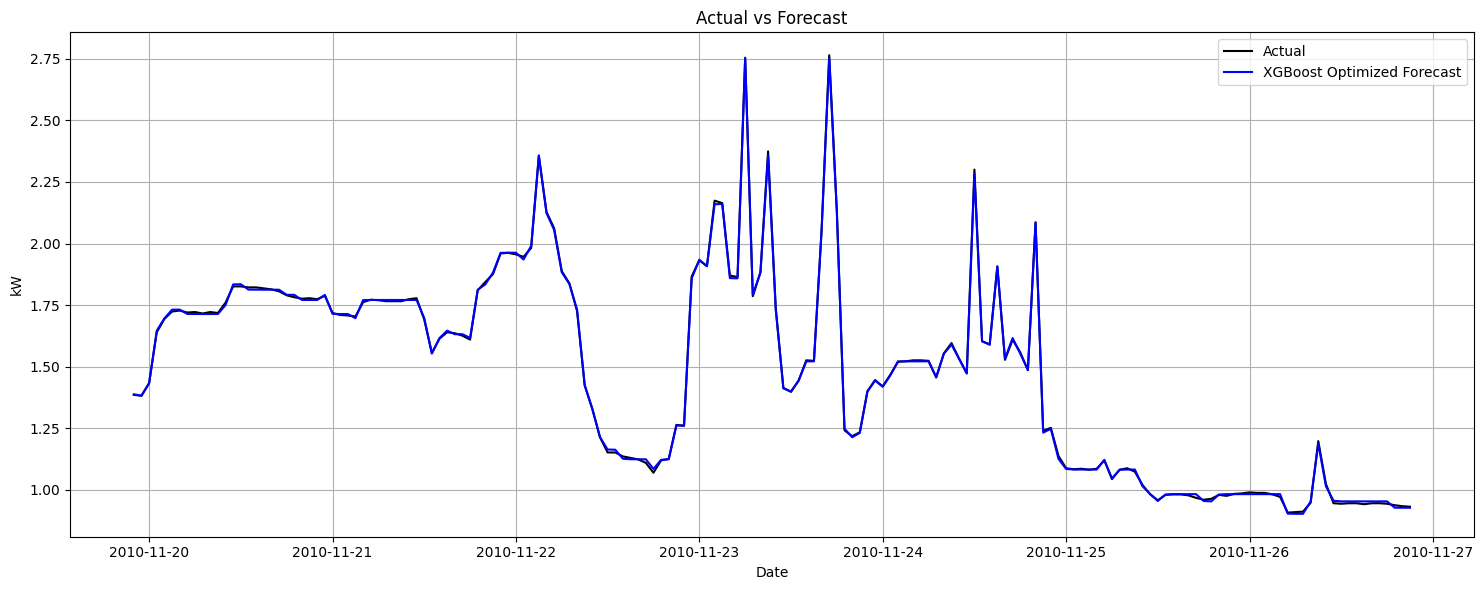

In [ ]:
# plot forecast vs actual

plt.figure(figsize=(15,6))
plt.plot(df_test.index, y_test2, label='Actual', color='black')
plt.plot(df_test.index, y_pred2, label='XGBoost Optimized Forecast', color='blue')
plt.title('Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend()
plt.grid(True)
plt.tight_layout()


# # Add interactive cursor
# mplcursors.cursor(hover=True)

plt.show()


####### Try plotly to have the interactive hover effect

In [240]:
import plotly.graph_objs as go
import plotly.offline as pyo

trace_actual = go.Scatter(
    x=df_test.index, y=y_test2,
    mode='lines',
    name='Actual',
    line=dict(color='black')
)
trace_pred = go.Scatter(
    x=df_test.index, y=y_pred2,
    mode='lines',
    name='XGOpt Forecast',
    line=dict(color='green')
)

layout = go.Layout(
    title='Actual vs Forecast',
    xaxis=dict(title='Date'),
    yaxis=dict(title='kW'),
    hovermode='x unified'
)

fig = go.Figure(data=[trace_actual, trace_pred], layout=layout)
pyo.iplot(fig)  # Use .show() if not in Jupyter

####### Wrap to a function so we can quickly tweak the testhours

In [241]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

def test_xgboost_forecast(data, test_hours=168):
    """
    Splits data into train/test, fits XGBoost, predicts, evaluates, and plots results.
    Args:
        data: DataFrame with features and 'Global_active_power' as target, indexed by DateTime.
        test_hours: Number of hours for the test set (int)
    """
    # 1. Train/test split
    df_train = data[:-test_hours]
    df_test = data[-test_hours:]
    X_train = df_train.drop(columns='Global_active_power')
    y_train = df_train['Global_active_power']
    X_test = df_test.drop(columns='Global_active_power')
    y_test = df_test['Global_active_power']

    # 2. Fit XGBoost
    model = XGBRegressor(n_estimators=100, learning_rate=0.1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 3. Evaluate
    def evaluate(y_true, y_pred):
        y_true = np.array(y_true).flatten()
        y_pred = np.array(y_pred).flatten()
        if len(y_true) != len(y_pred):
            raise ValueError(f"y_true and y_pred must have the same length (got {len(y_true)} and {len(y_pred)})")
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        mask = y_true > 0.1
        if np.sum(mask) == 0:
            mape = np.nan
        else:
            mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
        print(f'XGBoost → RMSE: {rmse:.3f}, MAE: {mae:.3f}, MAPE: {mape:.2f}% (filtered, y_true > 0.1)')
        return rmse, mae, mape

    rmse, mae, mape = evaluate(y_test, y_pred)

    # 4. Plot
    plt.figure(figsize=(15,6))
    plt.plot(df_test.index, y_test, label='Actual', color='black')
    plt.plot(df_test.index, y_pred, label='XGBoost Forecast', color='blue')
    plt.title(f'Actual vs XGBoost Forecast (Test Hours: {test_hours})')
    plt.xlabel('Date')
    plt.ylabel('kW')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return rmse, mae, mape, y_test, y_pred

# Example usage:
# test_xgboost_forecast(data2, test_hours=168)

XGBoost → RMSE: 0.007, MAE: 0.005, MAPE: 0.42% (filtered, y_true > 0.1)


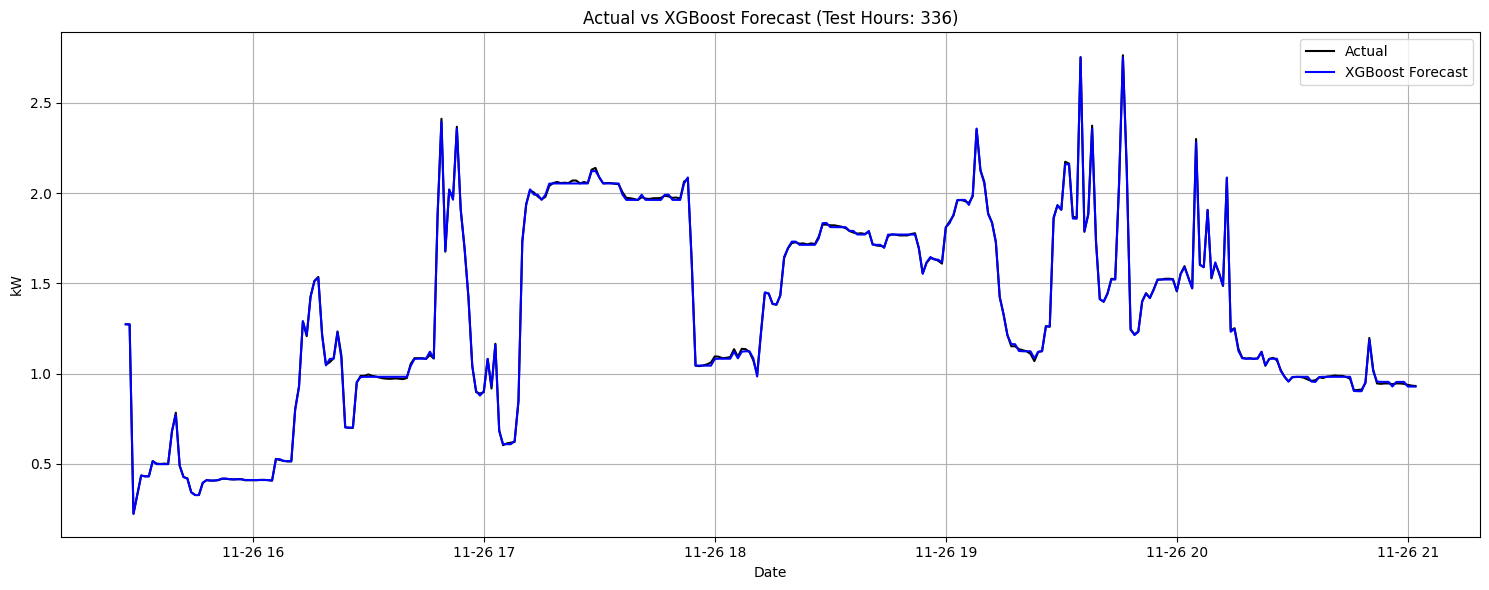

(0.006810482527903708,
 0.005248116052931266,
 0.416400225112831,
 DateTime
 2010-11-26 15:27:00    1.274
 2010-11-26 15:28:00    1.272
 2010-11-26 15:29:00    0.224
 2010-11-26 15:30:00    0.330
 2010-11-26 15:31:00    0.436
                        ...  
 2010-11-26 20:58:00    0.946
 2010-11-26 20:59:00    0.944
 2010-11-26 21:00:00    0.938
 2010-11-26 21:01:00    0.934
 2010-11-26 21:02:00    0.932
 Name: Global_active_power, Length: 336, dtype: float64,
 array([1.2738895 , 1.2742937 , 0.22420855, 0.3305064 , 0.43593997,
        0.431006  , 0.431006  , 0.51575273, 0.49903792, 0.4989702 ,
        0.4989702 , 0.4989702 , 0.68159586, 0.77322036, 0.4912023 ,
        0.42714092, 0.41903368, 0.3430649 , 0.32789513, 0.32789513,
        0.3949898 , 0.41106278, 0.40805006, 0.40805006, 0.41106278,
        0.41903368, 0.41903368, 0.41504604, 0.41504604, 0.41504604,
        0.41504604, 0.41106278, 0.41106278, 0.41106278, 0.41106278,
        0.41106278, 0.41106278, 0.41106278, 0.40805006, 0.526

In [244]:
# Example usage:
test_xgboost_forecast(data2, test_hours=336)